<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Creating a header... how could we use the .names file? Google didn't help

columns = ["party",
           "handicapped-infants",
           "water-project-cost-sharing",
           "adoption-of-the-budget-resolution",
           "physician-fee-freeze","el-salvador-aid",
           "religious-groups-in-schools","anti-satellite-test-ban",
           "aid-to-nicaraguan-contras", "mx-missile", "immigration",
           "synfuels-corporation-cutback", 
           "education-spending","superfund-right-to-sue",
           "crime",
           "duty-free-exports", 
           "export-administration-act-south-africa"]

In [0]:
# More information about our data below
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

In [0]:
# Loading our data 

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=columns)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# 4. Relevant Information:
#       This data set includes votes for each of the U.S. House of
#       Representatives Congressmen on the 16 key votes identified by the
#       CQA.  The CQA lists nine different types of votes: voted for, paired
#       for, and announced for (these three simplified to yea), voted
#       against, paired against, and announced against (these three
#       simplified to nay), voted present, voted present to avoid conflict
#       of interest, and did not vote or otherwise make a position known
#       (these three simplified to an unknown disposition).

# Maybe we can transform the ? to equal 0 instead to signify "unknown"
# Let's also convert into republican/dem to 0/1
# and n/y to 1/2

df.replace({'?':np.NaN, 'n':0, 'y':1}, inplace=True)
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Check for any null, NaN, or other values

print(df.isnull().sum(), "\n")
print(df.isna().sum())

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64 

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freez

In [0]:
# Republicans Dataframe
rep = df[df.party == "republican"]
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
# Democrats Dataframe
dem = df[df.party == "democrat"]
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


## 1-SAMPLE T-TESTING

In [0]:
# What kind of questions do we want to test? 

# A 1-sample T-Test tests the mean of one sample agaisnt a null hypothesis

# If I have encoded votes as 0 for no and 1 for yes, I want to test Democratic 
# support for an issue, and I use a null hypothesis of 0, then I am comparing 
# Democrat voting support against a null hypothesis of no Democrat support at 
# all for a given issue.

# If I use a null hypothesis of .5 then I am comparing the democrat voting 
# support against a null hypothesis of democrats being neither in favor or 
# against a particular issue.

# If I use a null hypothesis of 1 then I am comparing the democrat voting 
# support against a null hypothesis of all democrats being favor of a 
# particular issue.

# Null hypothesis: no Dem support for immigration legislation
stats.ttest_1samp(dem['immigration'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=15.28812018218839, pvalue=3.754505831904643e-38)

In [0]:
# Given the above results (SMALL P VALUE), we can REJECT THE NULL HYPOTHESIS that there is no 
# DEM immigration support at the 95% significance level

# We also see t-statistic denoting strong support

In [0]:
# Null hypothesis: equal Dem support for immigration legislation
stats.ttest_1samp(dem['immigration'], 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-0.9246846884388146, pvalue=0.35598081794452796)

In [0]:
# FAIL TO REJECT null hypothesis that democrats are evenly split on this issue

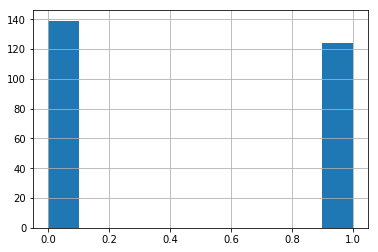

In [0]:
# How do these results compare to a visualization?
dem["immigration"].hist()

In [0]:
# Null hypothesis: no Dem support for handicapped-infants legislation
stats.ttest_1samp(dem['handicapped-infants'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=19.825711173357988, pvalue=1.0391992873567661e-53)

In [0]:
# REJECT NULL HYPOTHESIS
# We also see t-statistic denoting strong support

In [0]:
# Null hypothesis: equal Dem support for handicapped-infants legislation
stats.ttest_1samp(dem['handicapped-infants'], 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.000699612317167372)

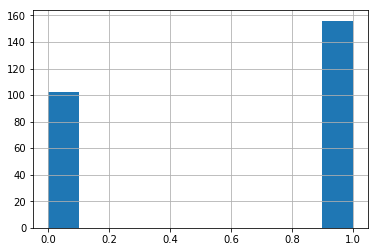

In [0]:
dem['handicapped-infants'].hist()

In [0]:
# Null hypothesis that there is even support for the bill among democrats.
stats.ttest_1samp(dem['physician-fee-freeze'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=-31.67705343439813, pvalue=6.796885728494356e-91)

In [0]:
# REJECT NULL HYPOTHESIS
# We also see the t-statistic indicating strong opposition

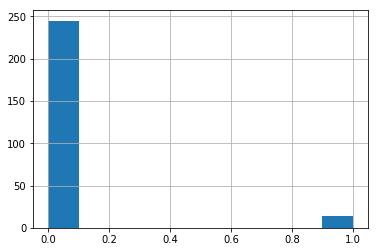

In [0]:
dem['physician-fee-freeze'].hist()

## 2-SAMPLE T-TESTING ( FOR MEANS )

In [0]:
# What if we didn't split up our dataframe?

# Two-sample T-tests are very similar to 1-sample t-tests, except that 
# instead of providing a raw value as a null hypothesis, we will be comparing 
# the mean of a second sample as the alternate hypothesis.

# Also notice that the order in which you pass the two samples to the 2-sample 
# test will reverse the direction of the t-statistic.

# A t-statistic with a positive sign indicates that the first sample mean is 
# higher than the second sample mean, and the significance level indicates 
# whether or not the means are different at the 95% confidence level.

# Null hypothesis: mean of DEM votes is equal to mean of REP votes for the issue

print(dem['mx-missile'].mean())
print(rep['mx-missile'].mean())

stats.ttest_ind(dem['mx-missile'], rep['mx-missile'], nan_policy='omit')

0.7580645161290323
0.11515151515151516


Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)

In [0]:
# REJECT THE NULL HYPOTHESIS, they are not equal and DEM support is greater 
# due to positive t-statistic

In [0]:
print(dem['water-project-cost-sharing'].mean())
print(rep['water-project-cost-sharing'].mean())

stats.ttest_ind(dem['water-project-cost-sharing'], rep['water-project-cost-sharing'], nan_policy='omit')

0.502092050209205
0.5067567567567568


Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [0]:
# FAIL TO REJECT THE NULL HYPOTHESIS, no significant different observed

## Let's visualize this!

In [0]:
def null_hypothesis_outcome(p_value):
    if p_value <= 0.05:
        return("Reject Null Hypothesis")
    else:
        return("Fail to Reject Null Hypothesis")

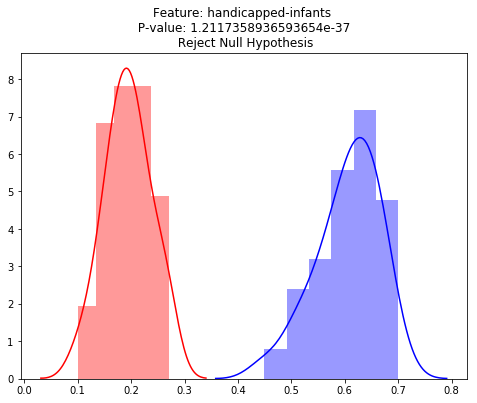

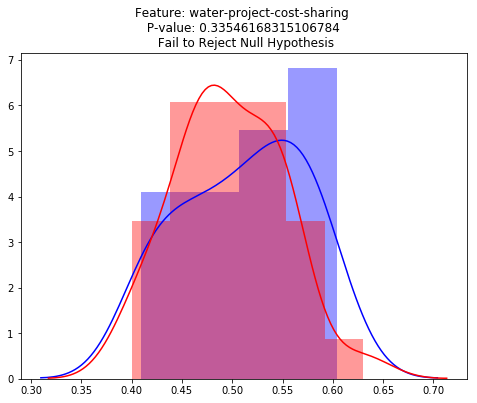

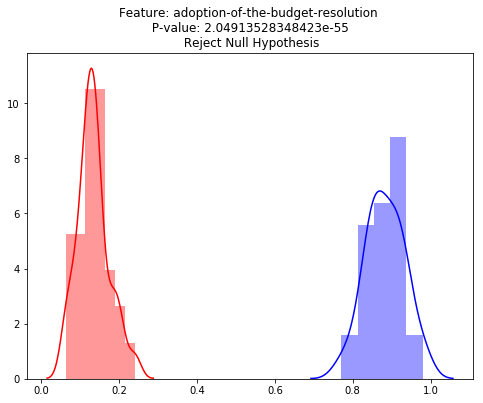

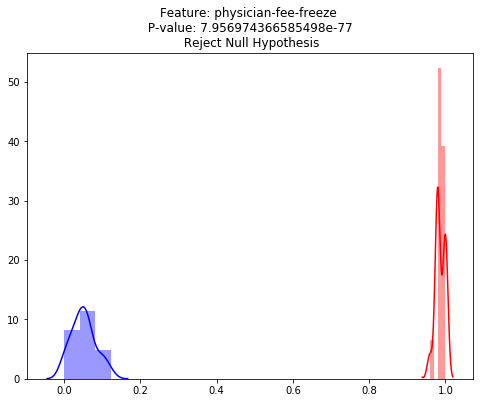

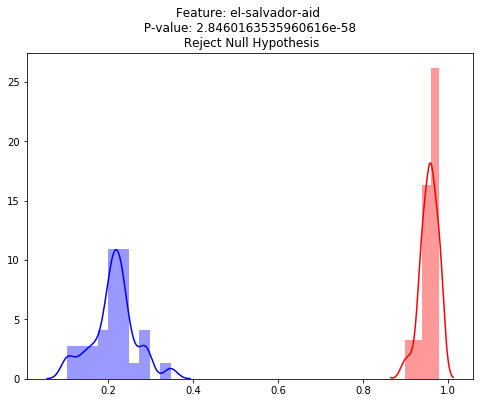

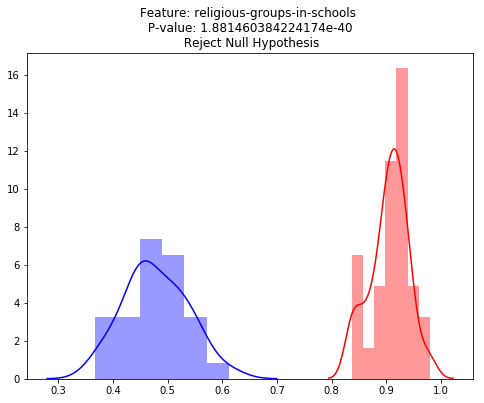

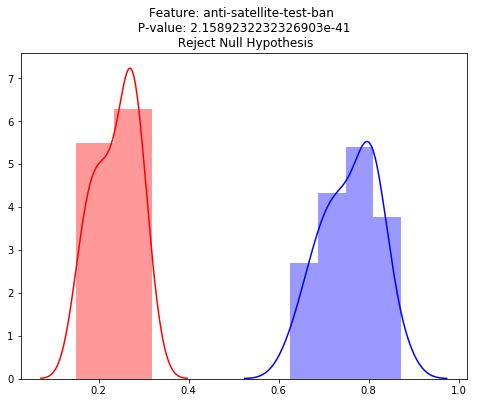

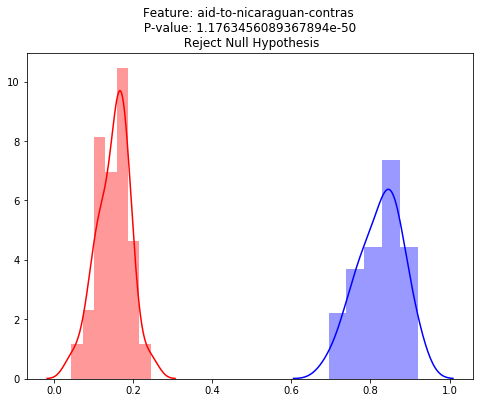

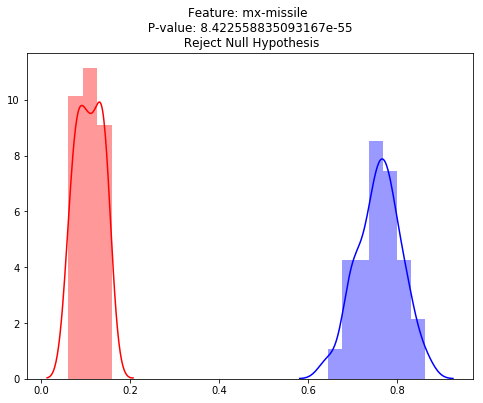

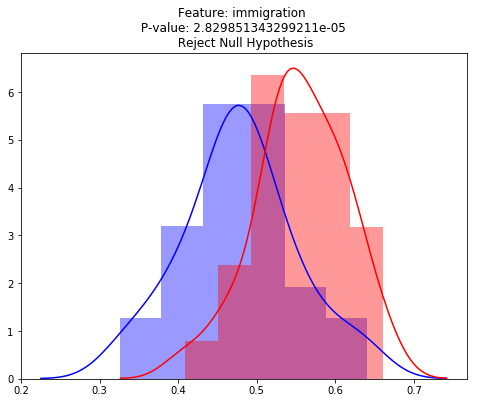

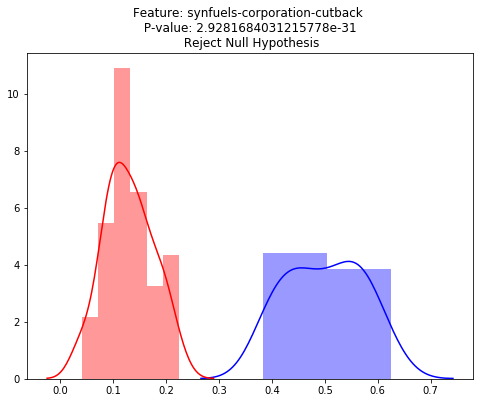

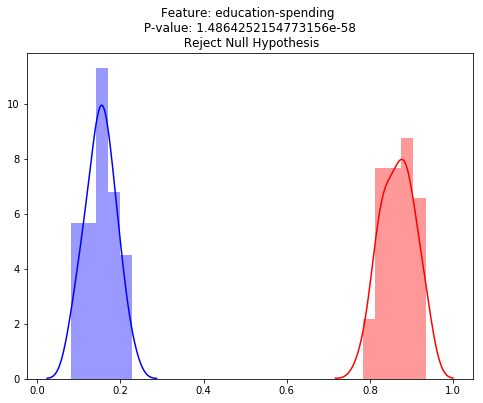

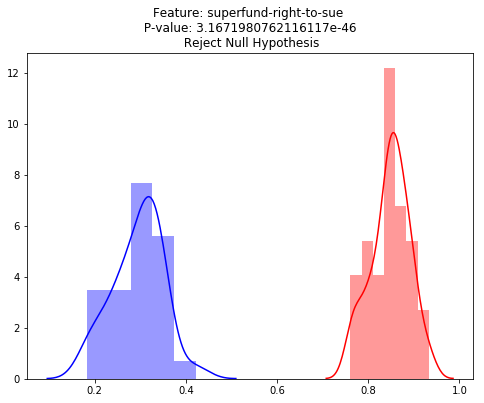

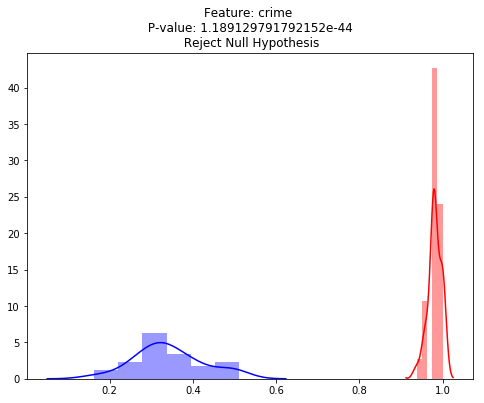

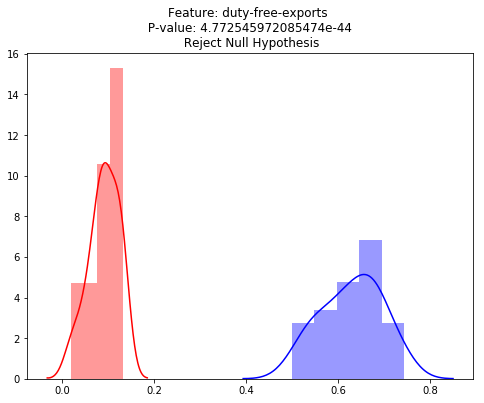

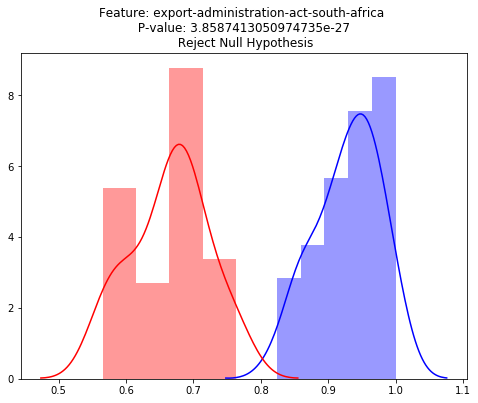

In [0]:
for col in df.columns[1:]: 
    vote_percent_d = []
    vote_percent_r = []
    for i in range(30):
        # Randomly sample 50 Democrats and Republicans for each issue
        vote_percent_d.append(dem[col].sample(50).mean())
        vote_percent_r.append(rep[col].sample(50).mean())

    # Plot Distribution
    plt.figure(figsize=(8,6))
    sns.distplot(vote_percent_d, color='b')
    sns.distplot(vote_percent_r, color='r')

    # Run t-test
    stat, pvalue = stats.ttest_ind(vote_percent_d, vote_percent_r)
    null_hyp_outcome = null_hypothesis_outcome(pvalue)
    
    # Plot 
    plt.title(f'Feature: {col} \n P-value: {pvalue} \n {null_hyp_outcome}');
    plt.show()